In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = f'{model_name_list[0].lower()}' # ArrayList: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



['61', '95', '59', '92', '66', '50', '68', '57', '32', '35', '69', '56', '51', '58', '67', '93', '94', '60', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '89', '45', '73', '87', '80', '74', '6', '28', '17', '1', '10', '19', '26', '8', '21', '75', '81', '86', '72', '44', '43', '88', '38', '36', '31', '91', '65', '62', '96', '100', '54', '98', '53', '30', '37', '39', '99', '52', '55', '97', '63', '64', '90', '46', '79', '41', '83', '77', '48', '70', '84', '24', '23', '4', '15', '3', '12', '85', '71', '76', '82', '49', '40', '47', '78', '2', '13', '5', '14', '22', '25']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model array: 19 of 101 = 18.81188118811881%
mutation score for rand_loop in model array: 25 of 101 = 24.752475247524753%
mutation score for bes_no_loop in model array: 19 of 101 = 18.81188118811881%
mutation score for rand_no_loop in model array: 25 of 101 = 24.752475247524753%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 27,
    'fig_hight' : 7,
    'x_lim' : 50,
    'y_lim' : 80,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'BES (loops)',
    'random_l_label': 'Random (loops)',
    'bes_no_l_label': 'BES (no self loops)',
    'random_no_l_label': 'Random (no self loops)' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown",
    'other': 'all'
    
    
}




all_common_mutants: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '76', '77', '80', '81', '88', '100', '25', '71', '72', '89', '97', '98']
labels: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '76', '77', '80', '81', '88', '100', '25', '71', '72', '89', '97', '98']
mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found
mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found
over_bound_list: ({('81', 495, 1, 8, 2), ('100', 80, 1, 80, 1), ('76', 495, 1, 8, 1), ('77', 65, 1, 8, 3)}, {'77', '100', '76', '81'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
81 & 495    & 1         & 8       & 2          \\ \hline
100 & 80    & 1         & 80       & 1          \\ \hline
76

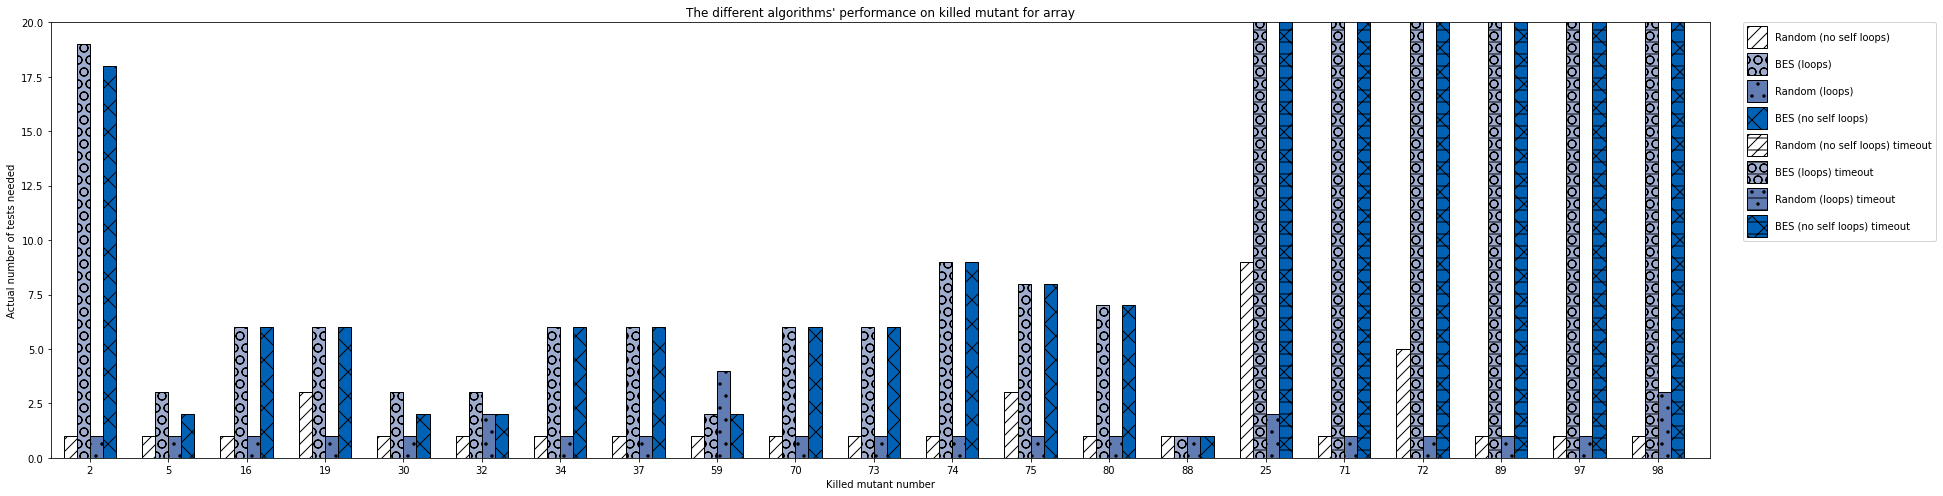

In [5]:

#################################
## Manually:
#################################

# actual_size

desired_mutants = m_lists[0]    #[0:6]
extras = np.array([25, 71, 72, 89, 97, 98])
desired_mutants  = np.append(desired_mutants, extras)
desired_mutants = desired_mutants.tolist()
print(f'all_common_mutants: {desired_mutants}')

# y = [ x for x in desired_mutants if x not in ['76', '81'] ]
# desired_mutants = y


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists


# latex.....
over_bound_list = get_over_bound_element(c_lists, desired_mutants, 30)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists




d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

d_map['x_lim'] = 62
d_map['y_lim'] = 20

plot_4_bars(labels, c_lists, d_map)


labels: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '76', '77', '80', '81', '88', '100', '25', '71', '72', '89', '97', '98']
mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found
mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found
bes_l data: ([1.505242109298706, 0.8613529205322266, 0.973402738571167, 0.8802599906921387, 0.9018759727478028, 0.664208173751831, 0.7182862758636475, 0.9298880100250244, 0.8283591270446777, 1.6781880855560305, 1.2655670642852783, 1.2171180248260498, 0.901634931564331, 3.450725793838501, 1.8978030681610107, 1.4740569591522217, 4.216195106506348, 1.2322921752929688, 1.8405160903930664, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 120, 120, 120, 120, 120])
rand_l data: ([1.558959722518921, 1.5552656650543213, 1.5778968334197998, 1.6009531021118164, 1.7589778900

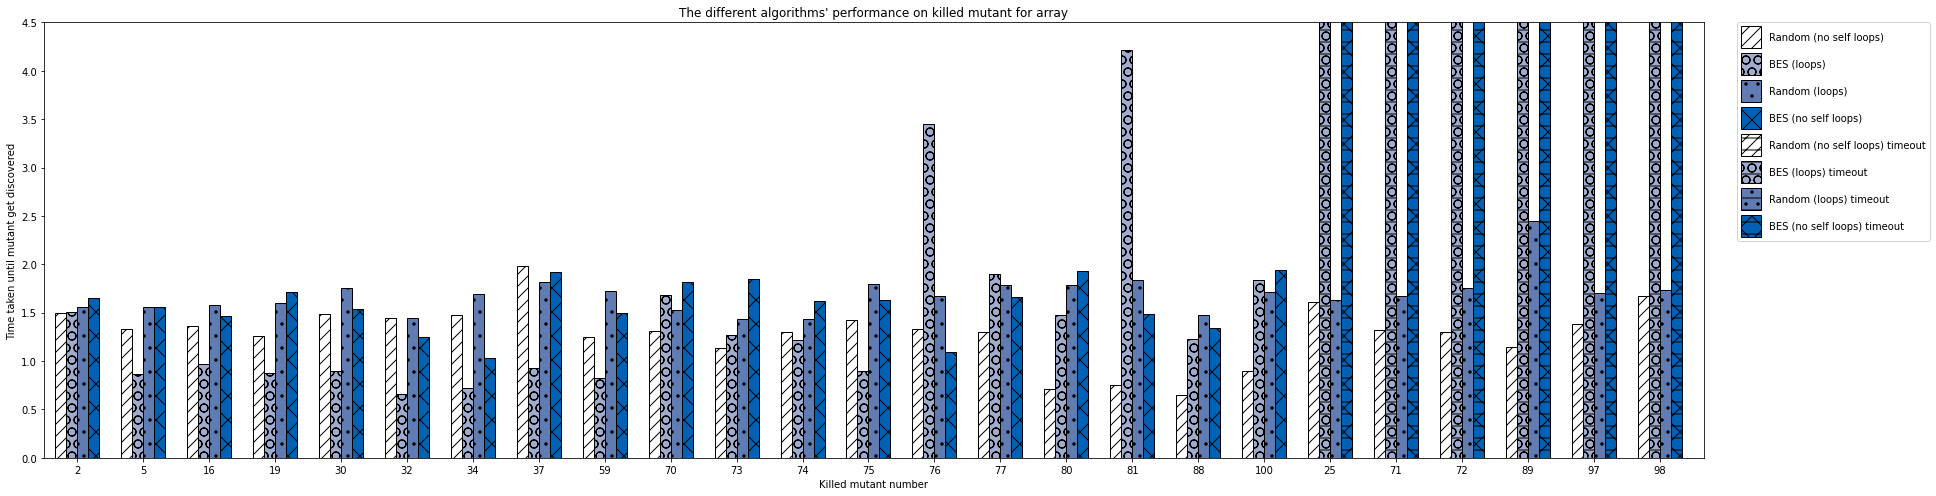

In [6]:
# time_requierd

# desired_mutants = m_lists[0][0:6]
# desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists



d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 74
d_map['y_lim'] = 4.5

plot_4_bars(labels, c_lists, d_map)



mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found
mutant 25 not_found
mutant 71 not_found
mutant 72 not_found
mutant 89 not_found
mutant 97 not_found
mutant 98 not_found


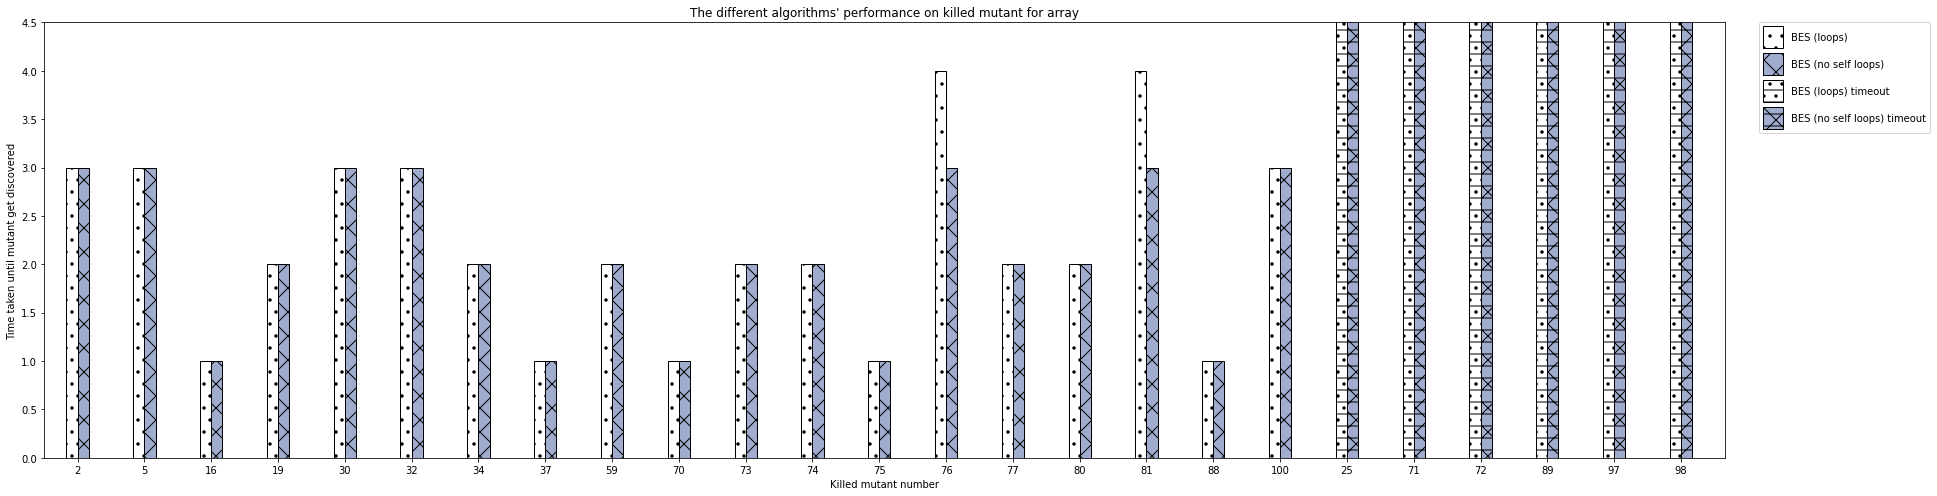

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, bes_no_lo_c) = c_lists

# print(c_lists)
# print(labels)


d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' = 25
d_map['y_lim'] = 4.5



plot_2_bars(labels, c_lists, d_map)

